In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

## Carregar Dataset (churn-modelling)

In [2]:
# https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# definindo dados
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

## Pré-processamento

In [4]:
# Converter as variáveis categóricas em numéricas
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 1] = le.fit_transform(X[:, 1])

# Divisão dos dados em 3 conjuntos (Treino, Desenvolvimento e Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_dev, y_train, y_dev   = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Padronização dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_dev   = sc.transform(X_dev)
X_test  = sc.transform(X_test)

## Experimento

In [5]:
# Treinando com o conjunto de treino e calibrando com o conjunto de desenvolvimento e a acurácia a taxa de aprendizado, número de camadas e função de ativação.
best_val_accuracy = 0
best_clf = None

for layer in [(10,), (20,), (30,), (40,)]:
        for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
            for activation in ['logistic', 'tanh', 'relu']:
                clf = MLPClassifier(hidden_layer_sizes=layer, learning_rate_init=learning_rate, activation=activation, max_iter=1000)
                clf.fit(X_train, y_train)
                y_dev_pred = clf.predict(X_dev)
                val_accuracy = accuracy_score(y_dev, y_dev_pred)
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_clf = clf

# Realizando a predição para o conjunto de teste com o melhor modelo de rede neural encontrado.
y_test_pred = best_clf.predict(X_test)

## Comparação

### Redes neurais

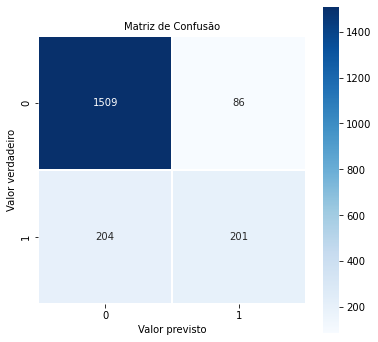

	Test Accuracy: 85.50%
	Test f1_score: 0.75%


In [6]:
# Exibindo Matriz de Confusão
confus_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confus_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Valor verdadeiro')
plt.xlabel('Valor previsto')
plt.title("Matriz de Confusão", fontsize=10)
plt.show()

# Exibindo Acurácia e f1
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred, average='macro')
print("\tTest Accuracy: {:.2f}%".format(test_accuracy*100))
print("\tTest f1_score: {:.2f}%".format(test_f1_score))

### Regressão Logística

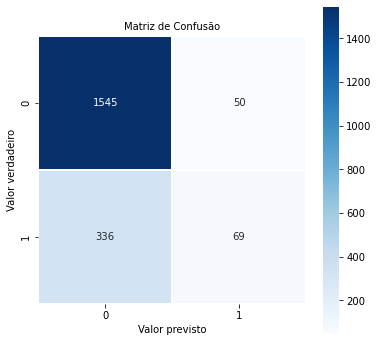

	Test Accuracy: 80.70%
	Test f1_score: 0.58%


In [7]:
# Treinando com o conjunto de treino
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Realizando a predição para o conjunto de teste 
y_test_pred_lr = lr.predict(X_test)

# Exibindo Matriz de Confusão
confus_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(confus_matrix_lr, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Valor verdadeiro')
plt.xlabel('Valor previsto')
plt.title("Matriz de Confusão", fontsize=10)
plt.show()

# Exibindo Acurácia e f1
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_f1_score_lr = f1_score(y_test, y_test_pred_lr, average='macro')
print("\tTest Accuracy: {:.2f}%".format(test_accuracy_lr*100))
print("\tTest f1_score: {:.2f}%".format(test_f1_score_lr))